Data cleaning and analysis

In [2]:
import pandas as pd
import re
import seaborn as sns
import numpy as np
%matplotlib inline
# from pandas_profiling import ProfileReport

In [3]:
df = pd.read_csv('old_data/merged_data_cleaned.csv')

In [4]:
df.head

<bound method NDFrame.head of       Index  Species                     Owner Country_of_Origin  \
0         0  Arabica                 metad plc          Ethiopia   
1         1  Arabica                 metad plc          Ethiopia   
2         2  Arabica  grounds for health admin         Guatemala   
3         3  Arabica       yidnekachew dabessa          Ethiopia   
4         4  Arabica                 metad plc          Ethiopia   
...     ...      ...                       ...               ...   
1334   1334  Robusta               luis robles           Ecuador   
1335   1335  Robusta               luis robles           Ecuador   
1336   1336  Robusta               james moore     United States   
1337   1337  Robusta             cafe politico             India   
1338   1338  Robusta             cafe politico           Vietnam   

                                     Farm_Name Lot_Number            Mill  \
0                                    metad plc        NaN       metad plc   

In [53]:
df['Species'].value_counts()

Arabica    1311
Robusta      28
Name: Species, dtype: int64

In [5]:
df.dtypes

Index                      int64
Species                   object
Owner                     object
Country_of_Origin         object
Farm_Name                 object
Lot_Number                object
Mill                      object
ICO_Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number_of_Bags             int64
Bag_Weight                object
In_Country_Partner        object
Harvest_Year              object
Grading_Date              object
Owner_1                   object
Variety                   object
Processing_Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean_Cup                float64
Sweetness                float64
Cupper_Points            float64
Total_Cup_

In [6]:
df.shape

(1339, 44)

In [7]:
df.isna().sum()

Index                       0
Species                     0
Owner                       7
Country_of_Origin           1
Farm_Name                 359
Lot_Number               1063
Mill                      318
ICO_Number                157
Company                   209
Altitude                  226
Region                     59
Producer                  232
Number_of_Bags              0
Bag_Weight                  0
In_Country_Partner          0
Harvest_Year               47
Grading_Date                0
Owner_1                     7
Variety                   226
Processing_Method         170
Aroma                       0
Flavor                      0
Aftertaste                  0
Acidity                     0
Body                        0
Balance                     0
Uniformity                  0
Clean_Cup                   0
Sweetness                   0
Cupper_Points               0
Total_Cup_Points            0
Moisture                    0
Category_One_Defects        0
Quakers   

In [8]:
df.isna().mean()*100

Index                     0.000000
Species                   0.000000
Owner                     0.522778
Country_of_Origin         0.074683
Farm_Name                26.811053
Lot_Number               79.387603
Mill                     23.749066
ICO_Number               11.725168
Company                  15.608663
Altitude                 16.878267
Region                    4.406273
Producer                 17.326363
Number_of_Bags            0.000000
Bag_Weight                0.000000
In_Country_Partner        0.000000
Harvest_Year              3.510082
Grading_Date              0.000000
Owner_1                   0.522778
Variety                  16.878267
Processing_Method        12.696042
Aroma                     0.000000
Flavor                    0.000000
Aftertaste                0.000000
Acidity                   0.000000
Body                      0.000000
Balance                   0.000000
Uniformity                0.000000
Clean_Cup                 0.000000
Sweetness           

In [9]:
df2 = df[['Species', 'Country_of_Origin', 'Harvest_Year', 'Variety', 'Processing_Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean_Cup', 'Sweetness', 'Cupper_Points', 'Moisture', 'Category_One_Defects', 'Color', 'Category_Two_Defects', 'Certification_Body', 'altitude_mean_meters', 'Total_Cup_Points',]].copy()

In [10]:
df2.dropna(inplace=True)

In [11]:
df2.shape

(902, 22)

In [12]:
for i in df2.columns:
    print('=== %s ===' % i)
    print(df2[i].value_counts())

=== Species ===
Arabica    899
Robusta      3
Name: Species, dtype: int64
=== Country_of_Origin ===
Mexico                          198
Guatemala                       149
Colombia                        111
Brazil                           95
Taiwan                           63
Honduras                         47
Costa Rica                       44
Tanzania, United Republic Of     35
Uganda                           24
Kenya                            19
China                            16
Indonesia                        13
El Salvador                      13
Nicaragua                        12
Malawi                           11
Ethiopia                          8
Thailand                          7
Myanmar                           7
Vietnam                           6
United States (Puerto Rico)       4
Haiti                             4
Philippines                       4
Panama                            3
Laos                              3
United States                     2


In [13]:
# df2['Harvest_Year'] = df2['Harvest_Year'].str.replace(re.compile(r'^\d+\s?/\s?(\d+)'),r'\1')

In [14]:
# arabica_data = df2.loc[df2['Species'] == 'Arabica']

In [15]:
# arabica_data.shape

(899, 22)

In [16]:
# arabica_data['Total_Cup_Points'].describe()

count    899.000000
mean      82.048854
std        2.601834
min       59.830000
25%       81.170000
50%       82.420000
75%       83.500000
max       89.920000
Name: Total_Cup_Points, dtype: float64

In [29]:
"""
conditions = [
    (arabica_data['Total_Cup_Points'] <= 70),
    (arabica_data['Total_Cup_Points'] > 70) & (arabica_data['Total_Cup_Points'] <= 80),
    (arabica_data['Total_Cup_Points'] > 80) & (arabica_data['Total_Cup_Points'] <= 85),
    (arabica_data['Total_Cup_Points'] > 85)
]

values = ['Poor Non-specialty', 'Good Non-specialty', 'Good Specialty', 'Excellent Specialty']

arabica_data['Points_Tiers'] = np.select(conditions, values)

"""

"\nconditions = [\n    (arabica_data['Total_Cup_Points'] <= 70),\n    (arabica_data['Total_Cup_Points'] > 70) & (arabica_data['Total_Cup_Points'] <= 80),\n    (arabica_data['Total_Cup_Points'] > 80) & (arabica_data['Total_Cup_Points'] <= 85),\n    (arabica_data['Total_Cup_Points'] > 85)\n]\n\nvalues = ['Poor Non-specialty', 'Good Non-specialty', 'Good Specialty', 'Excellent Specialty']\n\narabica_data['Points_Tiers'] = np.select(conditions, values)\n\n"

In [28]:
# arabica_data.to_csv('final_arabica_data.csv')

In [39]:
df3 = pd.read_csv('final_arabica_data.csv')

<AxesSubplot: >

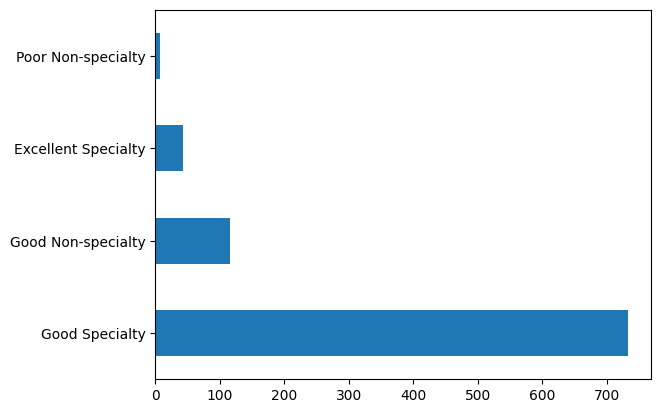

In [40]:
df3.Points_Tiers.value_counts().plot.barh()

<AxesSubplot: ylabel='Frequency'>

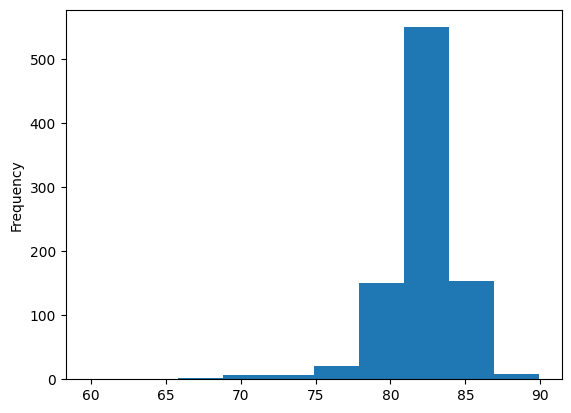

In [41]:
df3.Total_Cup_Points.plot.hist()

<AxesSubplot: >

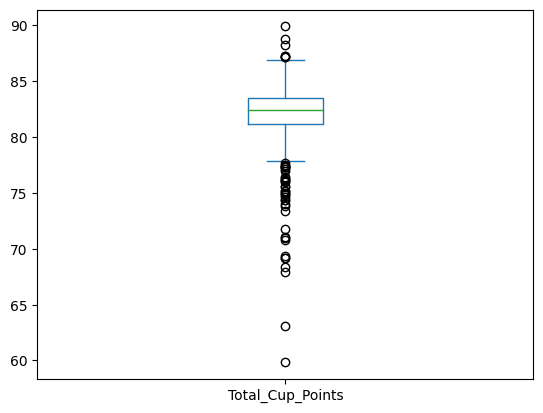

In [42]:
df3.Total_Cup_Points.plot.box()

In [43]:
df3.describe()

,Unnamed: 0,Harvest_Year,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points,Moisture,Category_One_Defects,Category_Two_Defects,altitude_mean_meters,Total_Cup_Points
count,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.00000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,675.971079,2013.867631,7.557809,7.503348,7.373804,7.515339,7.492269,7.487341,9.87228,9.849377,9.938354,7.458821,0.097475,0.423804,3.822024,1870.204352,82.048854
std,362.778536,1.709155,0.293985,0.309511,0.323207,0.299333,0.264364,0.334113,0.44115,0.768461,0.418352,0.388199,0.041328,2.039567,5.594255,9623.083463,2.601834
min,1.000000,2011.000000,5.080000,6.170000,6.170000,5.250000,6.330000,6.080000,6.00000,0.000000,1.330000,5.170000,0.000000,0.000000,0.000000,1.000000,59.830000
25%,363.000000,2012.000000,7.420000,7.330000,7.170000,7.330000,7.330000,7.330000,10.00000,10.000000,10.000000,7.250000,0.100000,0.000000,0.000000,1100.000000,81.170000
50%,693.000000,2014.000000,7.580000,7.500000,7.420000,7.500000,7.500000,7.500000,10.00000,10.000000,10.000000,7.500000,0.110000,0.000000,2.000000,1310.640000,82.420000
75%,979.500000,2015.000000,7.750000,7.670000,7.580000,7.670000,7.670000,7.670000,10.00000,10.000000,10.000000,7.670000,0.120000,0.000000,5.000000,1600.000000,83.500000
max,1309.000000,2018.000000,8.750000,8.670000,8.500000,8.580000,8.420000,8.580000,10.00000,10.000000,10.000000,8.580000,0.170000,31.000000,47.000000,190164.000000,89.920000


<AxesSubplot: xlabel='Total_Cup_Points', ylabel='Moisture'>

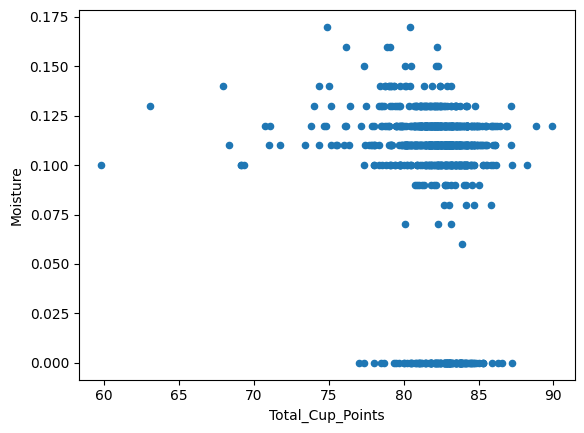

In [44]:
df3.plot.scatter(x='Total_Cup_Points', y='Moisture')

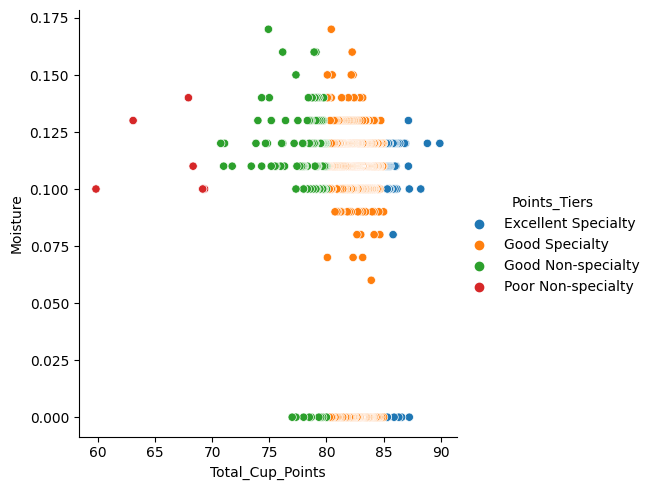

In [45]:
sns.relplot(x='Total_Cup_Points', y='Moisture', data=df3, hue='Points_Tiers')

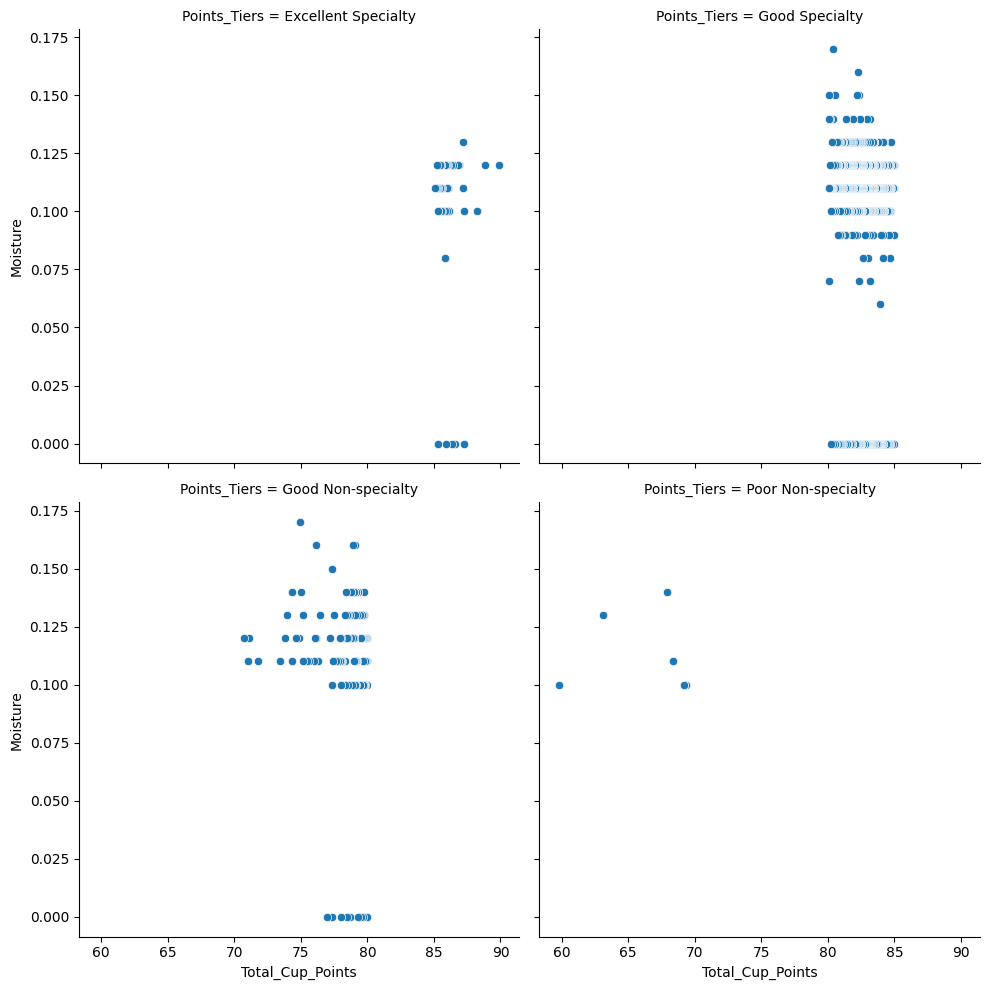

In [46]:
sns.relplot(x='Total_Cup_Points', y='Moisture', data=df3, col='Points_Tiers', col_wrap=2)

In [27]:
# sns.pairplot(df3)

C:\Users\mogam\AppData\Local\Temp\ipykernel_15860\173927309.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)


<AxesSubplot: >

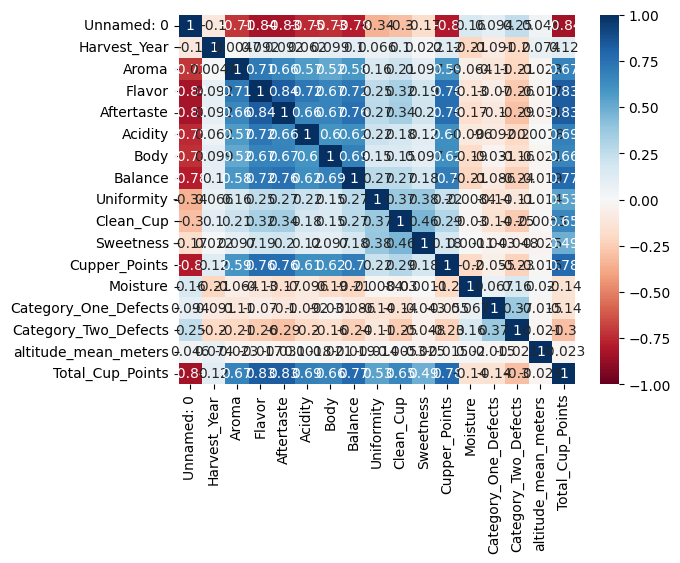

In [37]:
sns.heatmap(df3.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)

C:\Users\mogam\AppData\Local\Temp\ipykernel_15860\3722626868.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(characteristics.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)


<AxesSubplot: >

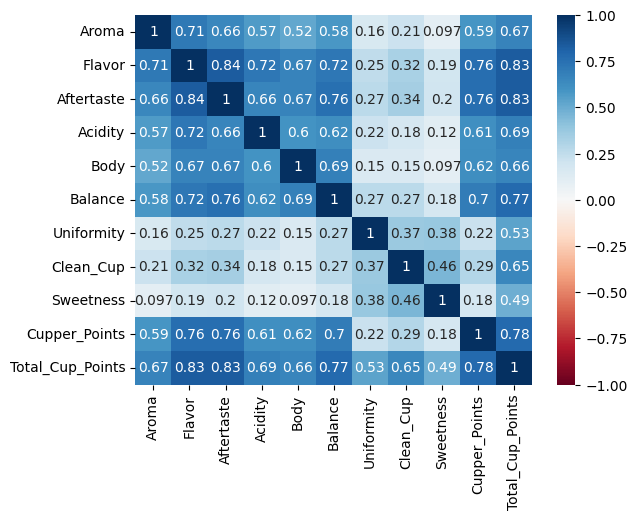

In [51]:
characteristics = df3[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean_Cup', 'Sweetness', 'Cupper_Points', 'Points_Tiers', 'Total_Cup_Points']].copy()

sns.heatmap(characteristics.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)

C:\Users\mogam\AppData\Local\Temp\ipykernel_15860\2849169619.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)


<AxesSubplot: >

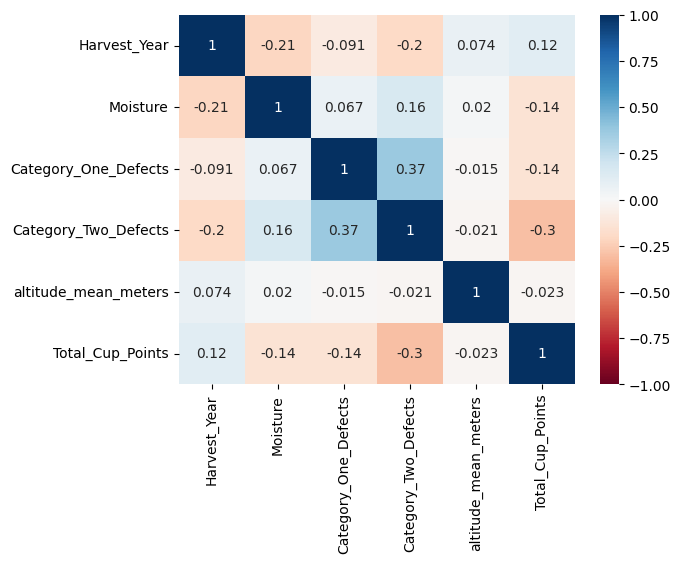

In [52]:
data = df3[['Country_of_Origin', 'Harvest_Year', 'Variety', 'Processing_Method', 'Moisture', 'Category_One_Defects', 'Color', 'Category_Two_Defects', 'altitude_mean_meters', 'Points_Tiers', 'Total_Cup_Points']].copy()

sns.heatmap(data.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)